In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import xlrd

In [23]:
df = pd.read_excel('pricefinc_cust.xls')
df.head(10)

,Median and Average Sales Price of Houses Sold by Type of Financing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Period,Median Sales Price,NaN,NaN,NaN,NaN,NaN,Average Sales Price,NaN,NaN,NaN,NaN,NaN
2,NaN,Total Sold,Type of Financing,NaN,NaN,NaN,NaN,NaN,Type of Financing,NaN,NaN,NaN,NaN
3,NaN,NaN,Conven-,FHA,VA,Rural,Cash,Total,Conven-,FHA,VA,Rural,Cash
4,NaN,NaN,tional1,Insured,Guaranteed,Hous. Serv.,NaN,NaN,tional1,Insured,Guaranteed,Hous. Serv.,NaN
5,1988,112500,135000,80000,87000,45800,108400,138300,159500,82000,92200,52000,128100
6,1989,120000,145000,82000,89000,42500,112000,148800,173100,84700,97800,48500,144000
7,1990,122900,147700,82700,91500,48000,117100,149800,173900,86500,103800,57300,149300
8,1991,120000,142400,84500,92400,46000,120000,147200,169400,87700,103200,57700,142300
9,1992,121500,138000,86500,99000,46500,116500,144100,161100,89900,107000,51500,137100


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Median and Average Sales Price of Houses Sold by Type of Financing  35 non-null     object
 1   Unnamed: 1                                                          35 non-null     object
 2   Unnamed: 2                                                          36 non-null     object
 3   Unnamed: 3                                                          35 non-null     object
 4   Unnamed: 4                                                          35 non-null     object
 5   Unnamed: 5                                                          35 non-null     object
 6   Unnamed: 6                                                          34 non-null     object
 7   Unnamed: 7                  

In [25]:
#drop NaN rows and rows representing data prior to 2002
price_finc = df.dropna()
price_finc = price_finc.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18])
price_finc

,Median and Average Sales Price of Houses Sold by Type of Financing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
19,2002,187600,206900,127900,144200,94600,195600,228700,246300,132900,147300,106700,232800
20,2003,195000,215700,128200,150900,100900,184500,246300,263600,133100,155400,106800,256100
21,2004,221000,238100,130100,149900,101000,199900,274500,290500,133900,158700,121100,245800
22,2005,240900,252200,134900,161500,104700,221000,297000,307500,140000,175300,108300,284600
23,2006,246500,258400,146200,184900,145100,246900,305900,316900,160100,195700,137200,301800
24,2007,247900,258500,151700,187700,139700,249400,313600,320000,161900,199700,148700,342900
25,2008,232100,250600,185800,193200,(NA),257500,292600,314100,204600,208900,(NA),322500
26,2009,216700,239900,182700,204100,(NA),262900,270900,298700,202400,225500,(NA),324600
27,2010,221800,252800,186900,210100,(NA),244700,272900,306100,206900,229300,(NA),318800
28,2011,227200,244700,191700,216900,(NA),232100,267900,288000,212600,235400,(NA),282700


In [50]:
#renaming columns 
price_finc.columns = ["Year", "Total Sold/Median", "Conventional Med.", "FHA-Insured Med.", "VA-Guaranteed Med.", "Rural Hous. Serv.", "Cash Med.", 
                     "Total Sold/Average", "Conventional Avg.", "FHA-Insured Avg.", "VA-Guaranteed Avg.", "Rural Hous. Serv.", "Cash Avg."]
price_finc.set_index(price_finc['Year'])
price_finc

,Year,Total Sold/Median,Conventional Med.,FHA-Insured Med.,VA-Guaranteed Med.,Rural Hous. Serv.,Cash Med.,Total Sold/Average,Conventional Avg.,FHA-Insured Avg.,VA-Guaranteed Avg.,Rural Hous. Serv.,Cash Avg.
19,2002,187600,206900,127900,144200,94600,195600,228700,246300,132900,147300,106700,232800
20,2003,195000,215700,128200,150900,100900,184500,246300,263600,133100,155400,106800,256100
21,2004,221000,238100,130100,149900,101000,199900,274500,290500,133900,158700,121100,245800
22,2005,240900,252200,134900,161500,104700,221000,297000,307500,140000,175300,108300,284600
23,2006,246500,258400,146200,184900,145100,246900,305900,316900,160100,195700,137200,301800
24,2007,247900,258500,151700,187700,139700,249400,313600,320000,161900,199700,148700,342900
25,2008,232100,250600,185800,193200,(NA),257500,292600,314100,204600,208900,(NA),322500
26,2009,216700,239900,182700,204100,(NA),262900,270900,298700,202400,225500,(NA),324600
27,2010,221800,252800,186900,210100,(NA),244700,272900,306100,206900,229300,(NA),318800
28,2011,227200,244700,191700,216900,(NA),232100,267900,288000,212600,235400,(NA),282700


In [51]:
#convert data types
price_finc['Year'] = pd.to_datetime(price_finc['Year'], format = '%Y')
price_finc

,Year,Total Sold/Median,Conventional Med.,FHA-Insured Med.,VA-Guaranteed Med.,Rural Hous. Serv.,Cash Med.,Total Sold/Average,Conventional Avg.,FHA-Insured Avg.,VA-Guaranteed Avg.,Rural Hous. Serv.,Cash Avg.
19,2002-01-01,187600,206900,127900,144200,94600,195600,228700,246300,132900,147300,106700,232800
20,2003-01-01,195000,215700,128200,150900,100900,184500,246300,263600,133100,155400,106800,256100
21,2004-01-01,221000,238100,130100,149900,101000,199900,274500,290500,133900,158700,121100,245800
22,2005-01-01,240900,252200,134900,161500,104700,221000,297000,307500,140000,175300,108300,284600
23,2006-01-01,246500,258400,146200,184900,145100,246900,305900,316900,160100,195700,137200,301800
24,2007-01-01,247900,258500,151700,187700,139700,249400,313600,320000,161900,199700,148700,342900
25,2008-01-01,232100,250600,185800,193200,(NA),257500,292600,314100,204600,208900,(NA),322500
26,2009-01-01,216700,239900,182700,204100,(NA),262900,270900,298700,202400,225500,(NA),324600
27,2010-01-01,221800,252800,186900,210100,(NA),244700,272900,306100,206900,229300,(NA),318800
28,2011-01-01,227200,244700,191700,216900,(NA),232100,267900,288000,212600,235400,(NA),282700


In [52]:
price_finc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 19 to 37
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                19 non-null     datetime64[ns]
 1   Total Sold/Median   19 non-null     int64         
 2   Conventional Med.   19 non-null     int64         
 3   FHA-Insured Med.    19 non-null     int64         
 4   VA-Guaranteed Med.  19 non-null     int64         
 5   Rural Hous. Serv.   19 non-null     object        
 6   Cash Med.           19 non-null     int64         
 7   Total Sold/Average  19 non-null     int64         
 8   Conventional Avg.   19 non-null     int64         
 9   FHA-Insured Avg.    19 non-null     int64         
 10  VA-Guaranteed Avg.  19 non-null     int64         
 11  Rural Hous. Serv.   19 non-null     object        
 12  Cash Avg.           19 non-null     int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory u

In [53]:
price_finc.columns

Index(['Year', 'Total Sold/Median', 'Conventional Med.', 'FHA-Insured Med.',
       'VA-Guaranteed Med.', 'Rural Hous. Serv.', 'Cash Med.',
       'Total Sold/Average', 'Conventional Avg.', 'FHA-Insured Avg.',
       'VA-Guaranteed Avg.', 'Rural Hous. Serv.', 'Cash Avg.'],
      dtype='object')

In [54]:
#drop Rural Hous. Serv. columns
price_finc.drop(['Rural Hous. Serv.'],axis =1)

,Year,Total Sold/Median,Conventional Med.,FHA-Insured Med.,VA-Guaranteed Med.,Cash Med.,Total Sold/Average,Conventional Avg.,FHA-Insured Avg.,VA-Guaranteed Avg.,Cash Avg.
19,2002-01-01,187600,206900,127900,144200,195600,228700,246300,132900,147300,232800
20,2003-01-01,195000,215700,128200,150900,184500,246300,263600,133100,155400,256100
21,2004-01-01,221000,238100,130100,149900,199900,274500,290500,133900,158700,245800
22,2005-01-01,240900,252200,134900,161500,221000,297000,307500,140000,175300,284600
23,2006-01-01,246500,258400,146200,184900,246900,305900,316900,160100,195700,301800
24,2007-01-01,247900,258500,151700,187700,249400,313600,320000,161900,199700,342900
25,2008-01-01,232100,250600,185800,193200,257500,292600,314100,204600,208900,322500
26,2009-01-01,216700,239900,182700,204100,262900,270900,298700,202400,225500,324600
27,2010-01-01,221800,252800,186900,210100,244700,272900,306100,206900,229300,318800
28,2011-01-01,227200,244700,191700,216900,232100,267900,288000,212600,235400,282700


In [56]:
#convert the objects in all columns into intergers
price_finc['Total Sold/Median'] = price_finc['Total Sold/Median'].astype(int)
price_finc['Conventional Med.'] = price_finc['Conventional Med.'].astype(int)
price_finc['FHA-Insured Med.'] = price_finc['FHA-Insured Med.'].astype(int)
price_finc['VA-Guaranteed Med.'] = price_finc['VA-Guaranteed Med.'].astype(int)
price_finc['Cash Med.'] = price_finc['Cash Med.'].astype(int)
price_finc['Total Sold/Average'] = price_finc['Total Sold/Average'].astype(int)
price_finc['Conventional Avg.'] = price_finc['Conventional Avg.'].astype(int)
price_finc['FHA-Insured Avg.'] = price_finc['FHA-Insured Avg.'].astype(int)
price_finc['VA-Guaranteed Avg.'] = price_finc['VA-Guaranteed Avg.'].astype(int)
price_finc['Cash Avg.'] = price_finc['Cash Avg.'].astype(int)
price_finc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 19 to 37
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                19 non-null     datetime64[ns]
 1   Total Sold/Median   19 non-null     int64         
 2   Conventional Med.   19 non-null     int64         
 3   FHA-Insured Med.    19 non-null     int64         
 4   VA-Guaranteed Med.  19 non-null     int64         
 5   Rural Hous. Serv.   19 non-null     object        
 6   Cash Med.           19 non-null     int64         
 7   Total Sold/Average  19 non-null     int64         
 8   Conventional Avg.   19 non-null     int64         
 9   FHA-Insured Avg.    19 non-null     int64         
 10  VA-Guaranteed Avg.  19 non-null     int64         
 11  Rural Hous. Serv.   19 non-null     object        
 12  Cash Avg.           19 non-null     int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory u

<AxesSubplot:xlabel='Year', ylabel='Total Sold/Median'>

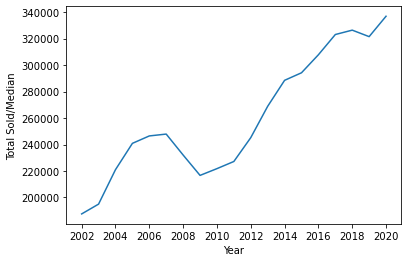

In [57]:
sns.lineplot(data= price_finc, x = 'Year', y = 'Total Sold/Median')

<AxesSubplot:xlabel='Year', ylabel='Total Sold/Average'>

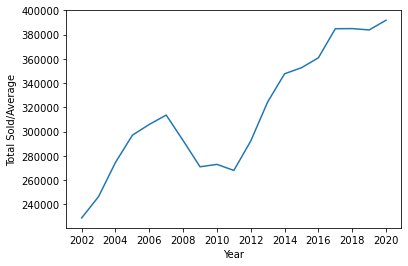

In [58]:
sns.lineplot(data = price_finc, x = 'Year', y = 'Total Sold/Average')

<AxesSubplot:xlabel='Year', ylabel='Conventional Med.'>

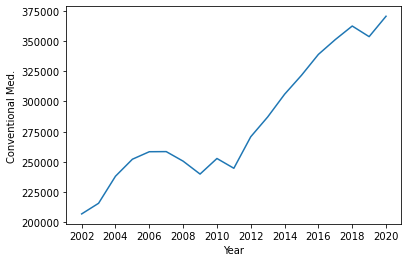

In [59]:
sns.lineplot(data = price_finc, x = 'Year', y = 'Conventional Med.')

<AxesSubplot:xlabel='Year', ylabel='Conventional Avg.'>

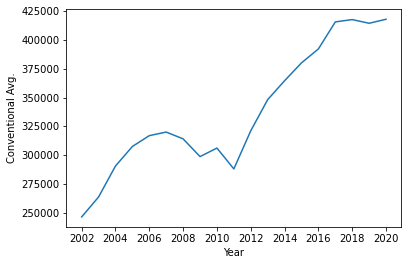

In [60]:
sns.lineplot(data = price_finc, x = 'Year', y = 'Conventional Avg.')

<AxesSubplot:xlabel='Year', ylabel='FHA-Insured Med.'>

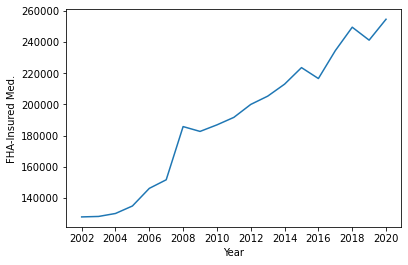

In [61]:
sns.lineplot(data = price_finc, x = 'Year', y = 'FHA-Insured Med.')

<AxesSubplot:xlabel='Year', ylabel='FHA-Insured Avg.'>

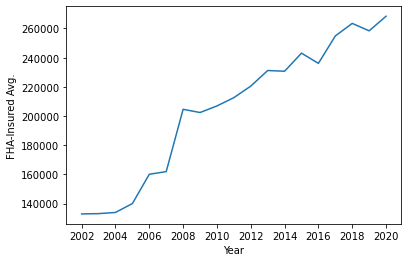

In [62]:
sns.lineplot(data = price_finc, x ='Year', y = 'FHA-Insured Avg.')

<AxesSubplot:xlabel='Year', ylabel='Cash Med.'>

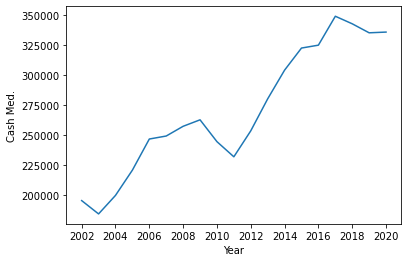

In [64]:
sns.lineplot(data = price_finc, x = "Year", y = 'Cash Med.')